In [3]:
import pandas as pd
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt
%matplotlib inline

digits= load_digits()

<Figure size 432x288 with 0 Axes>

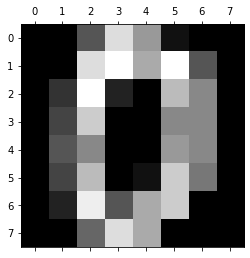

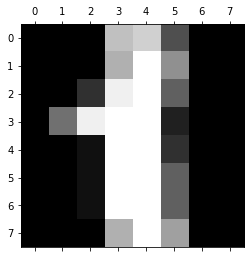

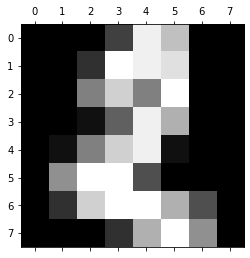

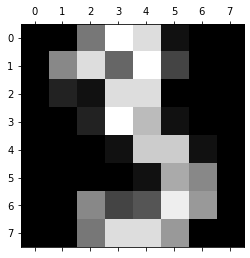

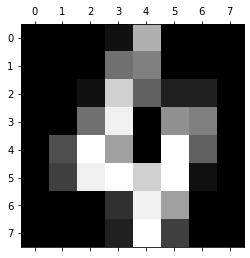

In [6]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [7]:
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [9]:
df['target'] = digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['target'],axis='columns'),digits.target,test_size=0.2)

In [14]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.975

In [25]:
model = RandomForestClassifier(n_estimators=50,max_depth=100)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9722222222222222

Text(69.0, 0.5, 'Truth')

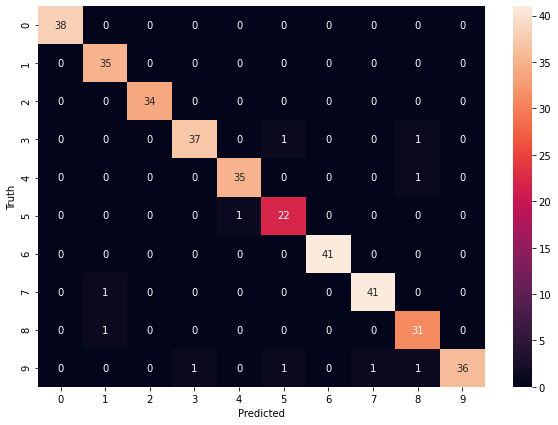

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

y_predicted = model.predict(X_test)
cm = confusion_matrix(y_test,y_predicted)
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [39]:
# HOMEWORK
from sklearn.datasets import load_iris

iris = load_iris()
iris.feature_names
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"] = iris.target

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('target',axis='columns'),df['target'],random_state=1, test_size=0.2)
model = RandomForestClassifier()
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.9666666666666667

<AxesSubplot:>

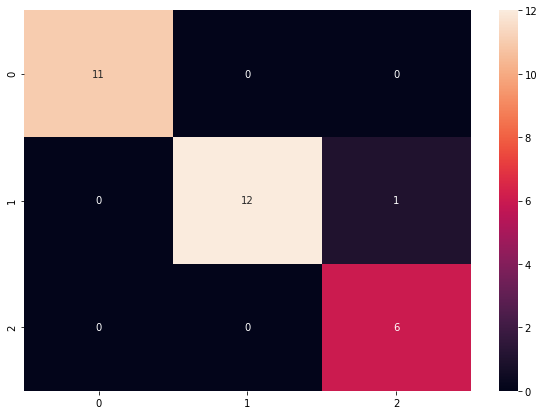

In [53]:
y_predicted = model.predict(X_test)
cm = confusion_matrix(y_test,y_predicted)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)

In [60]:
from sklearn.datasets import fetch_california_housing

houses = fetch_california_housing()
houses.DESCR

'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block group\n        - HouseAge      median house age in block group\n        - AveRooms      average number of rooms per household\n        - AveBedrms     average number of bedrooms per household\n        - Population    block group population\n        - AveOccup      average number of household members\n        - Latitude      block group latitude\n        - Longitude     block group longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttps://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n\nThe target variable is the median house value for California districts,\nexpressed in hundreds of thousands of dollars ($100,000

In [77]:
# df = pd.DataFrame(houses.data, columns=houses.feature_names)
# df['target'] = houses.target
# df
from sklearn.ensemble import RandomForestRegressor
X,y = houses.data, houses.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
model = RandomForestRegressor(max_depth=100)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8123047919188563